# SOM example


---


**Binome:\
-Feriel BOUDJATIT\
-Wissal ACHOUR**

#Implementing a Self-Organizing Map


In [ ]:
# Return the (g,h) index of the BMU in the grid
def find_BMU(SOM,x):
    distSq = (np.square(SOM - x)).sum(axis=2)
    return np.unravel_index(np.argmin(distSq, axis=None), distSq.shape)
    
# Update the weights of the SOM cells when given a single training example
# and the model parameters along with BMU coordinates as a tuple
def update_weights(SOM, train_ex, learn_rate, radius_sq, 
                   BMU_coord, step=3):
    g, h = BMU_coord
    #if radius is close to zero then only BMU is changed
    if radius_sq < 1e-3:
        SOM[g,h,:] += learn_rate * (train_ex - SOM[g,h,:])
        return SOM
    # Change all cells in a small neighborhood of BMU
    for i in range(max(0, g-step), min(SOM.shape[0], g+step)):
        for j in range(max(0, h-step), min(SOM.shape[1], h+step)):
            dist_sq = np.square(i - g) + np.square(j - h)
            dist_func = np.exp(-dist_sq / 2 / radius_sq)
            SOM[i,j,:] += learn_rate * dist_func * (train_ex - SOM[i,j,:])   
    return SOM    

# Main routine for training an SOM. It requires an initialized SOM grid
# or a partially trained grid as parameter
def train_SOM(SOM, train_data, learn_rate = .1, radius_sq = 1, 
             lr_decay = .1, radius_decay = .1, epochs = 10):    
    learn_rate_0 = learn_rate
    radius_0 = radius_sq
    for epoch in np.arange(0, epochs):
        rand.shuffle(train_data)      
        for train_ex in train_data:
            g, h = find_BMU(SOM, train_ex)
            SOM = update_weights(SOM, train_ex, 
                                 learn_rate, radius_sq, (g,h))
        # Update learning rate and radius
        learn_rate = learn_rate_0 * np.exp(-epoch * lr_decay)
        radius_sq = radius_0 * np.exp(-epoch * radius_decay)            
    return SOM

#Running the Self-Organizing Map on a Practical Example
The code below initializes a training data matrix and an SOM grid with random RGB colors. It also displays the training data and the randomly initialized SOM grid. Note, the training matrix is a 3000x3 matrix, however, we have reshaped it to 50x60x3 matrix for visualization:

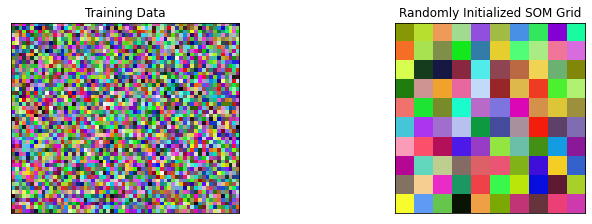

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# Dimensions of the SOM grid
m = 10
n = 10
# Number of training examples
n_x = 3000
rand = np.random.RandomState(0)
# Initialize the training data
train_data = rand.randint(0, 255, (n_x, 3))
# Initialize the SOM randomly
SOM = rand.randint(0, 255, (m, n, 3)).astype(float)
# Display both the training matrix and the SOM grid
fig, ax = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
ax[0].imshow(train_data.reshape(50, 60, 3))
ax[0].title.set_text('Training Data')
ax[1].imshow(SOM.astype(int))
ax[1].title.set_text('Randomly Initialized SOM Grid')

#SOM training
Let's now train the SOM and check up on it every 5 iterations as a quick overview of its progress:

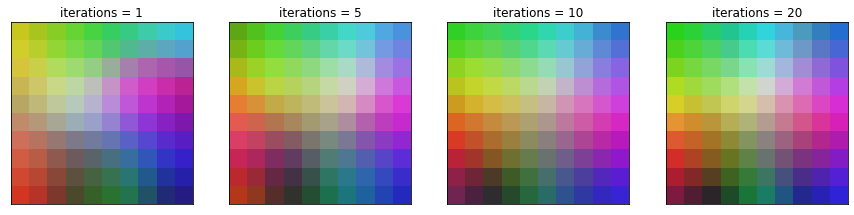

In [ ]:
fig, ax = plt.subplots(
    nrows=1, ncols=4, figsize=(15, 3.5), 
    subplot_kw=dict(xticks=[], yticks=[]))
total_epochs = 0
for epochs, i in zip([1, 4, 5, 10], range(0,4)):
    total_epochs += epochs
    SOM = train_SOM(SOM, train_data, epochs=epochs)
    ax[i].imshow(SOM.astype(int))
    ax[i].title.set_text('iterations = ' + str(total_epochs))

#Effect of Learning Rate and Radius
To see how the learning rate varies for different learning rates and radii, we can run the SOM for 10 epochs when starting from the same initial grid. The code below trains the SOM for three different values of the learning rate and three different radii.

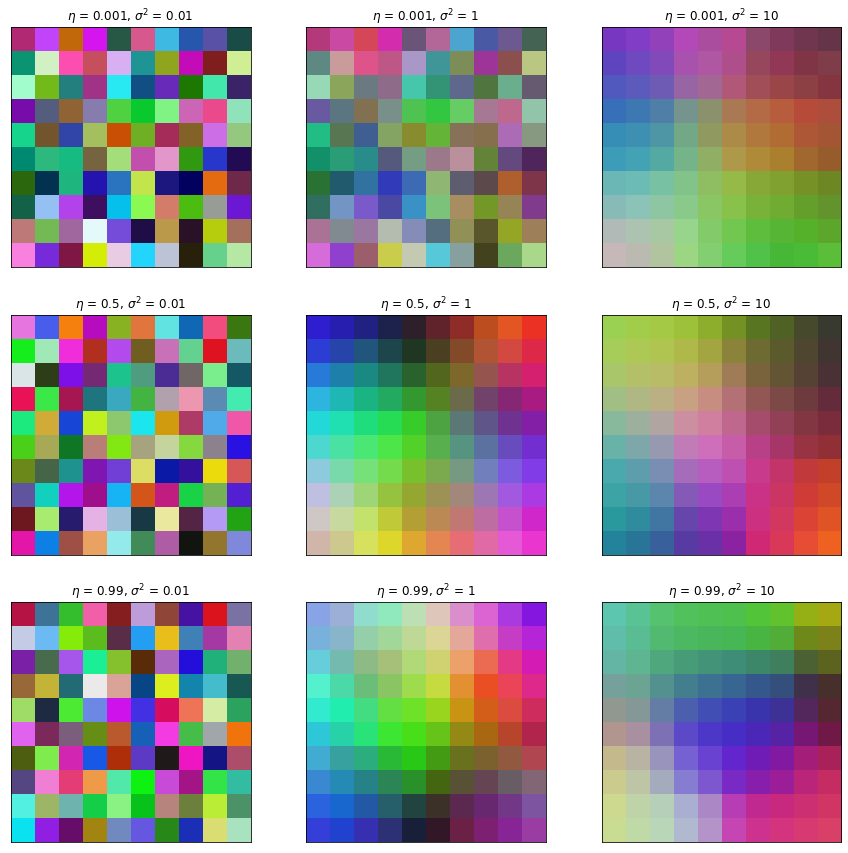

In [ ]:
fig, ax = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15), 
    subplot_kw=dict(xticks=[], yticks=[]))

# Initialize the SOM randomly to the same state

for learn_rate, i in zip([0.001, 0.5, 0.99], [0, 1, 2]):
    for radius_sq, j in zip([0.01, 1, 10], [0, 1, 2]):
        rand = np.random.RandomState(0)
        SOM = rand.randint(0, 255, (m, n, 3)).astype(float)        
        SOM = train_SOM(SOM, train_data, epochs = 10,
                        learn_rate = learn_rate, 
                        radius_sq = radius_sq)
        ax[i][j].imshow(SOM.astype(int))
        ax[i][j].title.set_text('$\eta$ = ' + str(learn_rate) + 
                                ', $\sigma^2$ = ' + str(radius_sq))
                                

# Implementation on Fashion-MNIST


---





#Installing the library minisom

In [ ]:
pip install minisom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --upgrade som-pbc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Visualization of sample images

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
import time

data = pd.read_csv('/content/fashion-mnist_test.csv')
labels = data['label'].values
label_name = {0:'T-shirt',1:'trouser',2:'pullover',3:'dress',4:'coat',5:'sandal',6:'shirt',7:'sneaker',8:'bag', 9:'ankle boot'}
data = data.drop(columns=['label'])
# data normalization
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)
data = data.values

The number of images = 10000
The number of classes = 10


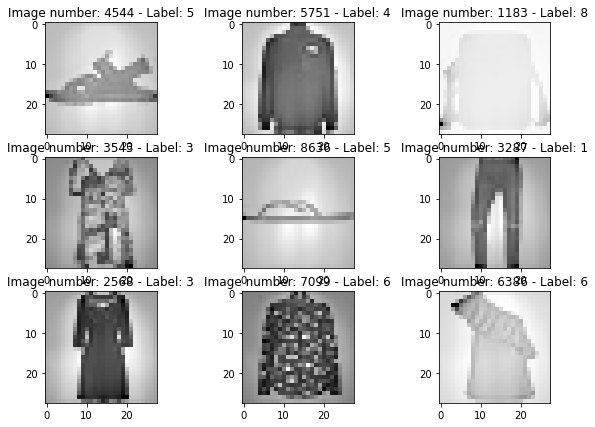

In [ ]:
number_images = data.shape[0]
number_classes = np.unique(labels).size # Other solution : yn.max()+1

print('The number of images = {}'.format(number_images))
print('The number of classes = {}'.format(number_classes))

j = 1
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
for i in range(9):
    cur = np.random.randint(number_images)
    fig.add_subplot(3,3,j)
    plt.imshow(data[cur].reshape(28,28), cmap='gray_r')
    plt.title('Image number: {} - Label: {}'.format(cur, labels[cur]))
    #plt.colorbar()                                         
    j=j+1

plt.show()

#Start training

In [ ]:
# Initialization and training
start_time = time.time()

n_neurons = 20
m_neurons = 20
som = MiniSom(n_neurons, m_neurons, data.shape[1], sigma=3, learning_rate=0.5, 
              neighborhood_function='gaussian', random_seed=0)

som.pca_weights_init(data)
som.train(data, 8000, verbose=True)  # random training

 [ 8000 / 8000 ] 100% - 0:00:00 left 
 quantization error: 15.942455411537457


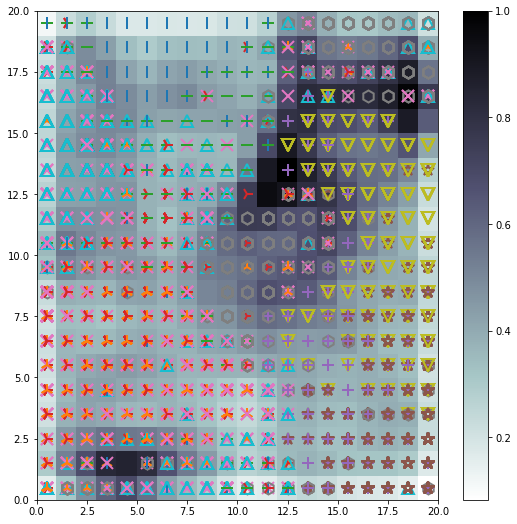

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(9, 9))

plt.pcolor(som.distance_map().T, cmap='bone_r')  # plotting the distance map as background
plt.colorbar()

# Plotting the response for each pattern in the iris dataset
# different colors and markers for each label
markers = ['|', '2', '_','4','+','x','*','h','v','^']
colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C6', 'C5', 'C7', 'C8', 'C9']
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[labels[cnt]-1],markeredgecolor=colors[labels[cnt]-1], markerfacecolor='None', markersize=12, markeredgewidth=2)
plt.show()
end_time = time.time() - start_time

In [ ]:
print(int(end_time),"seconds taken to complete the task.")

68 seconds taken to complete the task.


To have an overview of how the samples are distributed across the map a scatter chart can be used where each dot represents the coordinates of the winning neuron. A random offset is added to avoid overlaps between points within the same cell.

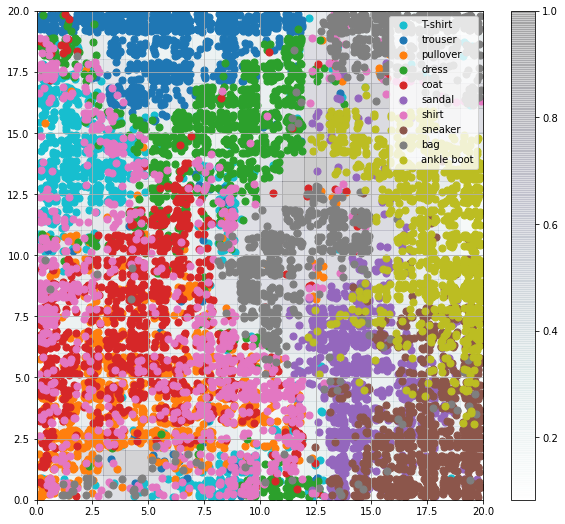

In [ ]:
w_x, w_y = zip(*[som.winner(d) for d in data])
w_x = np.array(w_x)
w_y = np.array(w_y)

plt.figure(figsize=(10, 9))
plt.pcolor(som.distance_map().T, cmap='bone_r', alpha=.2)
plt.colorbar()

for c in np.unique(labels):
    idx_target = labels==c
    plt.scatter(w_x[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8,
                w_y[idx_target]+.5+(np.random.rand(np.sum(idx_target))-.5)*.8, 
                s=50, c=colors[c-1], label=label_name[c])
plt.legend(loc='upper right')
plt.grid()
plt.savefig('resulting_images.png')
plt.show()

To have an idea of which neurons of the map are activated more often we can create another pseudocolor plot that reflects the activation frequencies:

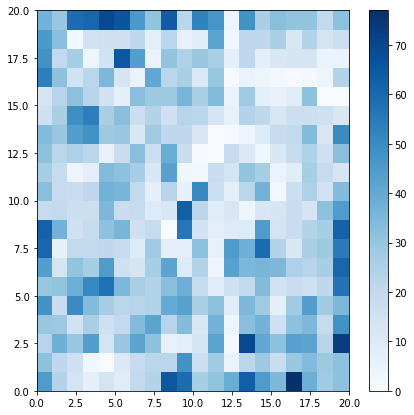

In [ ]:
plt.figure(figsize=(7, 7))
frequencies = som.activation_response(data)
plt.pcolor(frequencies.T, cmap='Blues') 
plt.colorbar()
plt.show()

We can visualize the proportion of samples per class falling in a specific neuron using a pie chart per neuron:

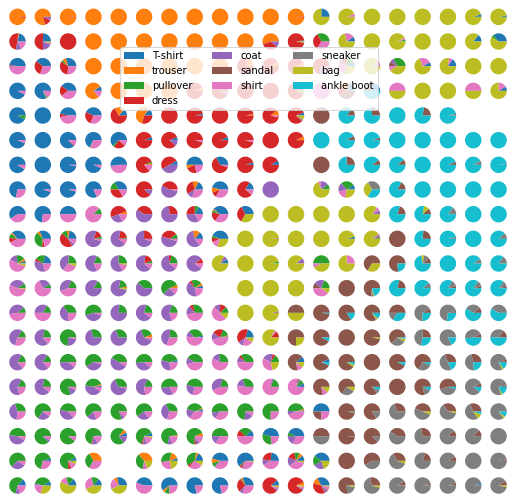

In [ ]:
import matplotlib.gridspec as gridspec

labels_map = som.labels_map(data, [label_name[t] for t in labels])

fig = plt.figure(figsize=(9, 9))
the_grid = gridspec.GridSpec(n_neurons, m_neurons, fig)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_name.values()]
    plt.subplot(the_grid[n_neurons-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.legend(patches, label_name.values(), bbox_to_anchor=(3.5, 6.5), ncol=3)
plt.savefig('som_seed_pies.png')
plt.show()

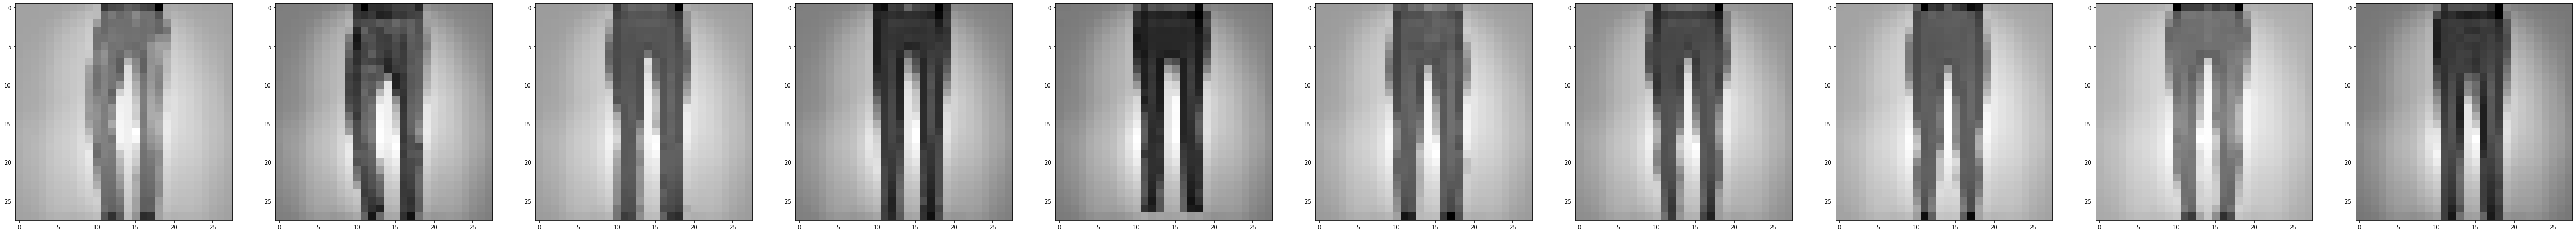

In [ ]:
winner_map = som.win_map(data)
f, ax = plt.subplots(1,10)
f.set_size_inches(80, 40)
for i in range(10):
    ax[i].imshow(winner_map[list(winner_map)[1]][i].reshape(28, 28),cmap='gray_r', interpolation='nearest')
plt.show()

In [ ]:
def classify(som, data):
    """Classifies each sample in data in one of the classes definited
    using the method labels_map.
    Returns a list of the same length of data where the i-th element
    is the class assigned to data[i].
    """
    winmap = som.labels_map(data,labels)
    default_class = np.sum(list(winmap.values())).most_common()[0][0]
    result = []
    for d in data:
        win_position = som.winner(d)
        if win_position in winmap:
            result.append(winmap[win_position].most_common()[0][0])
        else:
            result.append(default_class)
    return result
from sklearn.metrics import classification_report
print(classification_report(labels, classify(som, data)))

              precision    recall  f1-score   support

           0       0.68      0.81      0.74      1000
           1       0.97      0.93      0.95      1000
           2       0.60      0.62      0.61      1000
           3       0.79      0.81      0.80      1000
           4       0.60      0.62      0.61      1000
           5       0.83      0.80      0.82      1000
           6       0.51      0.36      0.42      1000
           7       0.80      0.80      0.80      1000
           8       0.90      0.90      0.90      1000
           9       0.85      0.90      0.87      1000

    accuracy                           0.76     10000
   macro avg       0.75      0.76      0.75     10000
weighted avg       0.75      0.76      0.75     10000



To understand how the training evolves we can plot the quantization and topographic error of the SOM at each step. This is particularly important when estimating the number of iterations to run:

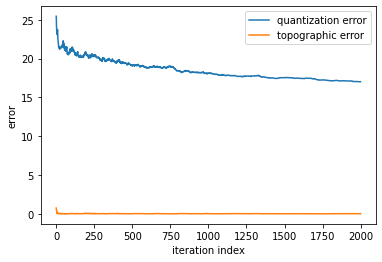

In [ ]:
som = MiniSom(10, 20, data.shape[1], sigma=3., learning_rate=.7,
              neighborhood_function='gaussian', random_seed=10)

max_iter = 2000
q_error = []
t_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(data))
    som.update(data[rand_i], som.winner(data[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(data))
    t_error.append(som.topographic_error(data))

plt.plot(np.arange(max_iter), q_error, label='quantization error')
plt.plot(np.arange(max_iter), t_error, label='topographic error')
plt.ylabel('error')
plt.xlabel('iteration index')
plt.legend()
plt.show()

#Added experimentation with complete dataset

Here we experimented with the complete 70000 pictures of the Fashion MNIST dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from minisom import MiniSom
from hyperopt import fmin, hp, tpe, Trials, STATUS_OK
import concurrent.futures
import time
import tensorflow as tf
from pylab import bone, pcolor, colorbar, plot, show, rcParams, savefig

In [ ]:
def convert(imgf, labelf, outf, n):
    f = open(imgf, "rb")
    o = open(outf, "w")
    l = open(labelf, "rb")

    f.read(16)
    l.read(8)
    images = []

    for i in range(n):
        image = [ord(l.read(1))]
        for j in range(28*28):
            image.append(ord(f.read(1)))
        images.append(image)

    for image in images:
        o.write(",".join(str(pix) for pix in image)+"\n")
    f.close()
    o.close()
    l.close()

In [ ]:
# Loading training and test set
convert("/content/train-images-idx3-ubyte", "/content/train-labels-idx1-ubyte",
"/content/fashion-mnist_train.csv", 60000)
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')
train.head()

,9,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.341,0.342,0.343,0.344,0.345,0.346,0.347,0.348,0.349,0.350
0,0,0,0,0,0,0,1,0,0,0,...,119,114,130,76,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,3,0,0,0,0,0,0,0,0,33,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,133,167,73,0,0,0


In [ ]:
# Combining training and test set to get over 70k samples   'Flag_median', 
#new_train = train.iloc[:, 1:]
#new_test = test.iloc[:, 1:]
#som_data = pd.concat([new_train, new_test], ignore_index=True).values
#labels = pd.concat([train.iloc[:, :1], test.iloc[:, :1]], ignore_index=True).values
#trainy=train.iloc[:, :1]
#testy=test.iloc[:, :1]
#trainy.columns = range(0, trainy.columns.size)
#testy.columns = range(0, testy.columns.size)
#labels=pd.concat([trainy, testy], ignore_index=True).values

In [ ]:
# Combining training and test set to get over 70k samples
new_train = train.drop(columns=['9'])
new_test = test.drop(columns=['label'])
#som_data = pd.concat([new_train, new_test], ignore_index=True).values
labels = pd.concat([train['9'], test['label']], ignore_index=True).values

In [ ]:
new_train.columns = range(0, new_train.columns.size)
new_test.columns = range(0, new_test.columns.size)
som_data = pd.concat([new_train, new_test], ignore_index=True).values

In [ ]:
#Initializing the map
start_time = time.time()
# The map will have x*y = 50*50 = 2500 features  
som = MiniSom(x=50,y=60,input_len=som_data.shape[1],sigma=1.5,learning_rate=0.5)
# There are two ways to train this data
# train_batch: Data is trained in batches
# train_random: Random samples of data are trained. Following line of code provides random weights as we are going to use train_random for training
som.random_weights_init(som_data)

In [ ]:
# Training data for 1000 iterations
som.train_random(data=som_data,num_iteration=8000)

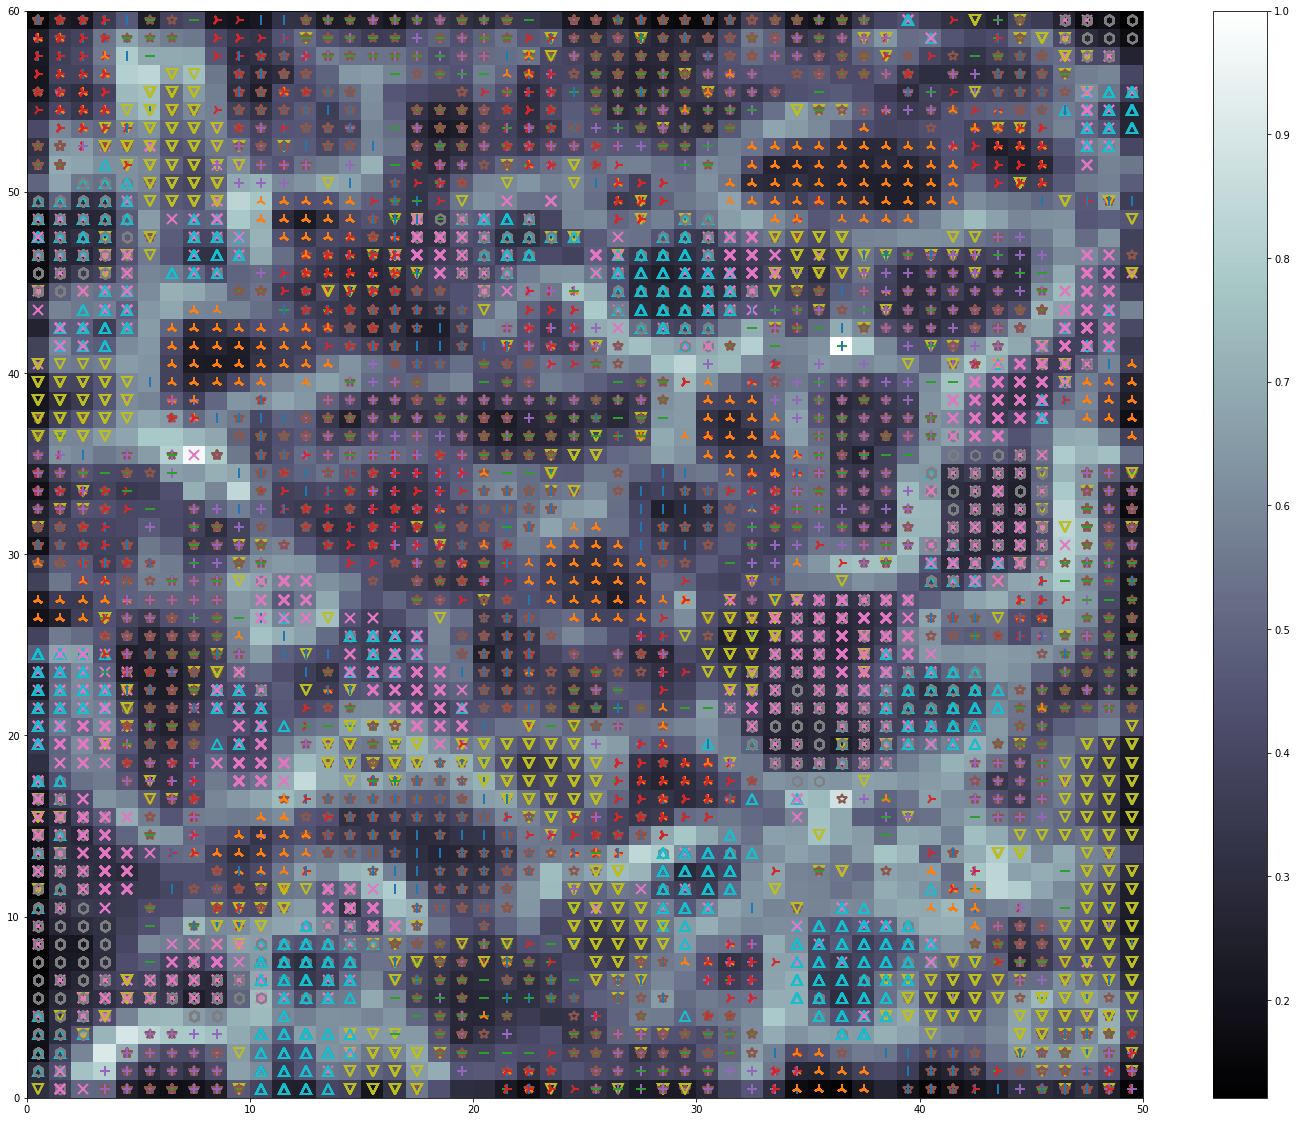

In [ ]:
import concurrent.futures
# Finally plotting the map
with concurrent.futures.ProcessPoolExecutor() as executor:
    rcParams['figure.figsize'] = 25, 20
    bone()
    pcolor(som.distance_map().T)
    colorbar()
    markers = ['|', '2', '_','4','+','x','*','h','v','^']
    colors = ['C0', 'C1', 'C2', 'C3', 'C4', 'C6', 'C5', 'C7', 'C8', 'C9']
    for i,x in enumerate(som_data):
        w = som.winner(x)
        plot(w[0]+0.5,w[1]+0.5,markers[labels[i]],markeredgecolor=colors[labels[i]],markerfacecolor='None',markersize=10,markeredgewidth=2)
    savefig("map.png")
    show()
end_time = time.time() - start_time

In [ ]:
print(int(end_time),"seconds taken to complete the task.")

5363 seconds taken to complete the task.



#K-Means on Fashion-MNIST (TP2)

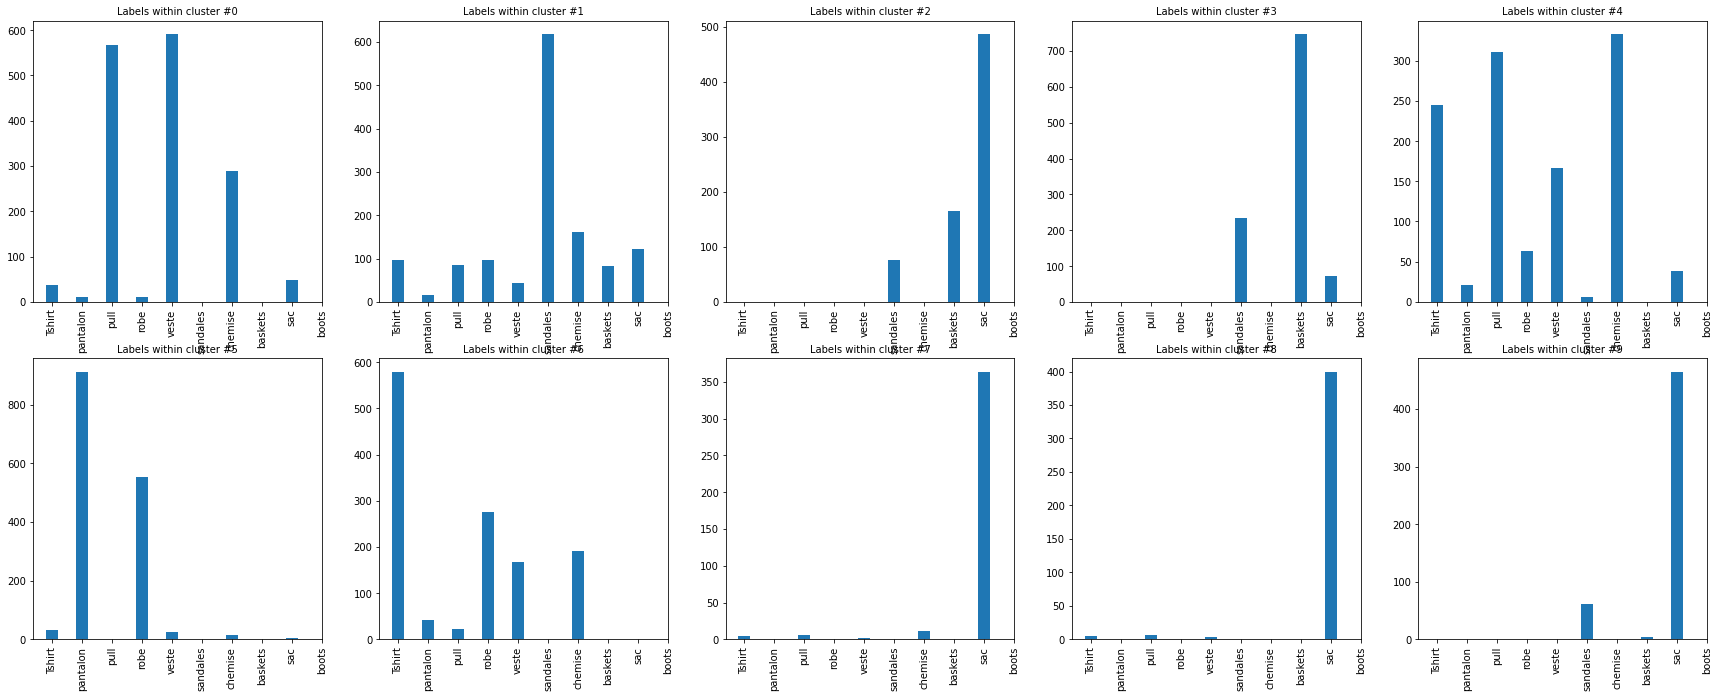

In [ ]:
fig = plt.figure();
fig.set_figheight(30)
fig.set_figwidth(30)
a = 1

for j in range(10):
  clusterL= []

  for i in cluster_index2[j]: 
      clusterL.append(yn[i,0])
  
  fig.add_subplot(5,5,a)
  plt.hist(clusterL, bins=range(10), rwidth=0.4, align='left')
  plt.title('Labels within cluster #{}'.format(j), fontsize=10)
  plt.xticks(np.arange(0, 9, step=0.2), rotation='vertical')
  plt.xticks(np.arange(10),['Tshirt','pantalon','pull','robe','veste','sandales','chemise','baskets','sac','boots'])
  a=a+1
  
plt.show()